In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cvlib

PATH = 'imagenes/'

In [2]:
def view(img):
    k = 5
    fig,ax1 = plt.subplots(figsize=(k,k))
    if len(img.shape)==2:
        ax1.imshow(img, vmin=0, vmax=255, cmap='gray')
    else:
        ax1.imshow(img)   
    plt.axis('off')
    plt.show()

In [3]:
im = cv.imread(PATH+'rice.png')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)

(256, 256)


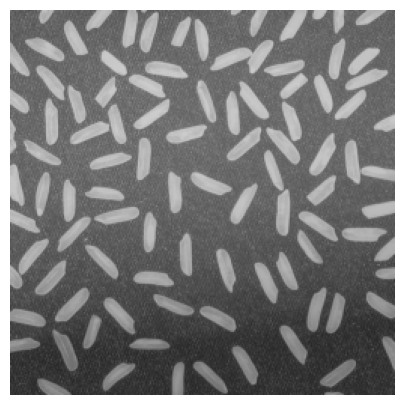

In [4]:
view(imgray)

# Tarea 1

1. ¿Cuántos granos de arroces hay?

2. ¿Cuáles son los granos más similares? 
    
3. ¿Cuál es la orientación de cada arroz?

### Pregunta 1: ¿Cuántos granos de arroces hay?

In [5]:
# adaptive Threshold
imgbin = cv.adaptiveThreshold(imgray, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,127,5)

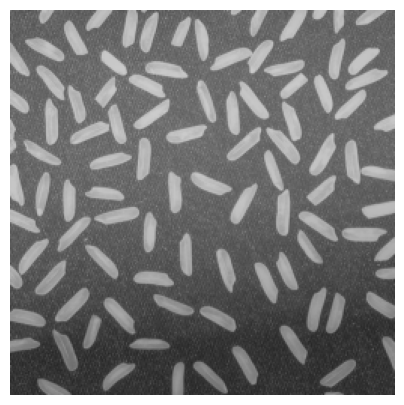

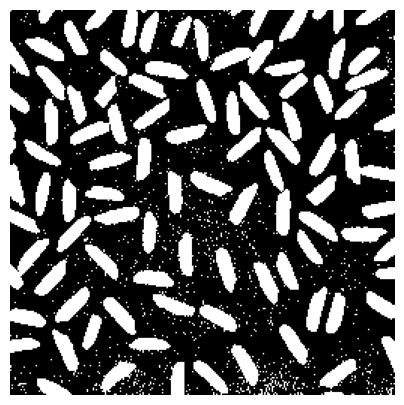

In [6]:
view(im)

view(imgbin)


In [7]:
kernel_cross = np.array([[  0, 255,  0],
                         [255, 255, 255],
                         [  0, 255,  0]], np.uint8)

kernel_vertical = np.array([[  0, 0,  255, 0, 0],
                            [  255, 255,  255, 255, 255],
                            [  255, 255,  255, 255, 255],
                            [  255, 255,  255, 255, 255],
                            [  0, 0,  255, 0, 0]], np.uint8)

Se usará erosion para eliminar el ruido de la imagen y separar los arroces que se sobrepongan.

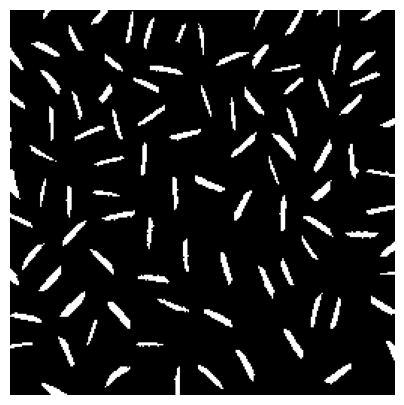

In [8]:
erosion = cv.erode(imgbin, kernel_cross, iterations=3)
view(erosion)

In [9]:
# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours_erosion, hierarchy = cv.findContours(erosion, mode, method[1])

Se detectaron: 100 arroces.


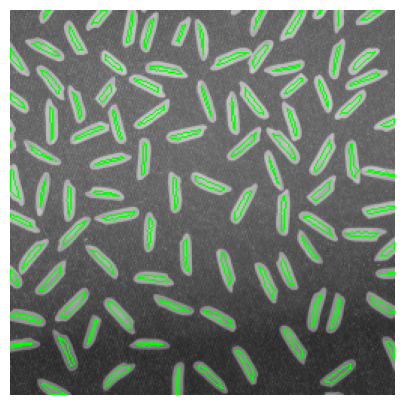

In [10]:
index =  606
color = (0,255,0) #(r,g,b)
thickness = 1
r = im.copy()

contador = len(contours_erosion)
for i in range(contador):
    r = cv.drawContours(r, contours_erosion, i, color, thickness)

print("Se detectaron:", contador, "arroces.")
view(r)

### Pregunta 2: ¿Cuáles son los granos más similares? 

In [11]:
# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(imgbin, mode, method[1])

El algoritmo encontró:  789 contornos.


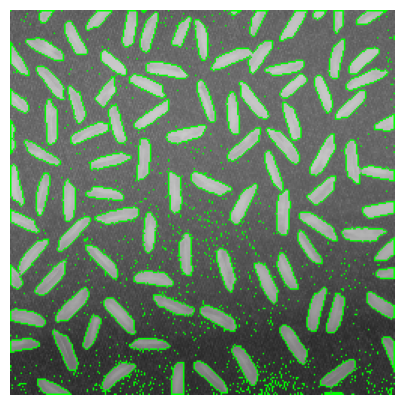

In [12]:
color = (0,255,0) #(r,g,b)
thickness = 1
r = im.copy()

contador = 0
for i in range(len(contours)):
    r = cv.drawContours(r, contours, i, color, thickness)
    contador += 1

print("El algoritmo encontró: ", contador, "contornos.")
view(r)

La mayoría de los contornos son puntos o ruido en la imagen, que fueron eliminados con "erosion" en el proceso pasado para contar los arroces. 

En esta segunda pregunta se usará otro método porque el objetivo es encontrar los arroces más parecidos y erosion elimina información importante para comparar los arroces.

El método será descartar por áreas. 

In [13]:
# Obtención de áreas
areas = []

for i in range(len(contours)): 
    areas.append(cv.contourArea(contours[i]))

(array([699.,   4.,   7.,  10.,  32.,  30.,   1.,   1.,   0.,   5.]),
 array([  0. ,  38.9,  77.8, 116.7, 155.6, 194.5, 233.4, 272.3, 311.2,
        350.1, 389. ]),
 <BarContainer object of 10 artists>)

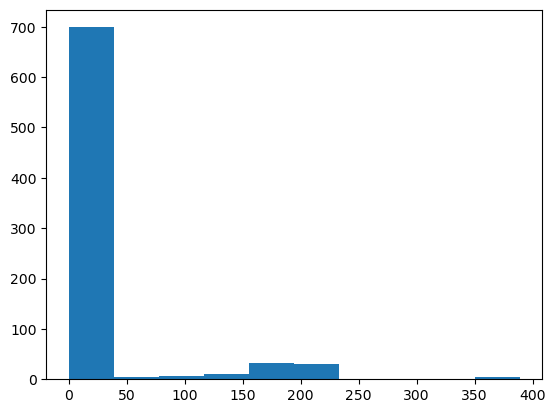

In [14]:
plt.hist(areas)

Se tomará 50 como el área mínima para descatar los arroces del ruido.

In [15]:
filtered_contours = []
filtered_areas = []

for i in range(len(contours)): 
    if areas[i] >= 100: 
        filtered_contours.append(contours[i])
        filtered_areas.append(areas[i])

print("Cantidad de contornos filtrados:", len(filtered_contours))

Cantidad de contornos filtrados: 84


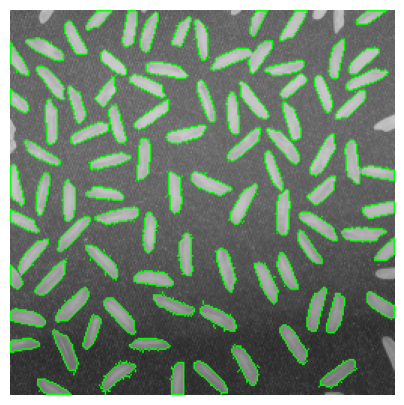

In [16]:
color = (0,255,0) #(r,g,b)
thickness = 1
r = im.copy()

contador = 0
for i in range(len(filtered_contours)):
    r = cv.drawContours(r, filtered_contours, i, color, thickness)
    contador += 1

view(r)

In [17]:
def similares(countours_arroces):
    n = len(countours_arroces)
    indice1 = -1 # indice del primer arroz
    indice2 = -1 # indice del segundo arroz
    retA = 0     # similitud anterior 

    for i in range(0, n):

        for j in range(0, n):

            ret = cv.matchShapes(countours_arroces[i], countours_arroces[j], 1, 0.0)

            if ret > retA: 
            # if (ret > retA) and (ret <= 1):     
                retA = ret 
                indice1 = i 
                indice2 = j

    return (indice1, indice2, retA)

(22, 45, 8.217512329211482)


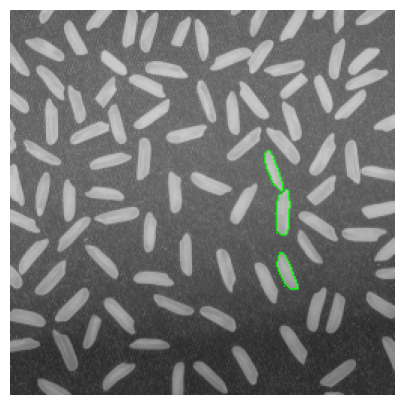

In [18]:
result = similares(filtered_contours)
print(result)

index =  606
color = (0,255,0) #(r,g,b)
thickness = 1
r = im.copy()

r = cv.drawContours(r, filtered_contours, result[0], color, thickness)
r = cv.drawContours(r, filtered_contours, result[1], color, thickness)

view(r)

### Pregunta 3: ¿Cuál es la orientación de cada arroz?

In [19]:
def get_angle(contorno):
    res = cv.fitEllipse(contorno)

    angulo = res[2]

    if angulo <= 90:
        angulo = 90 - angulo 
    else:
        angulo = 180 - angulo + 90 

    return angulo

In [20]:
# Obtención de todos los angulos 

angulos = {}
n = len(filtered_contours)
for i in range(n):
    angulos[i] = get_angle(filtered_contours[i])


El ángulo del arroz es:  148.52286529541016 grados.


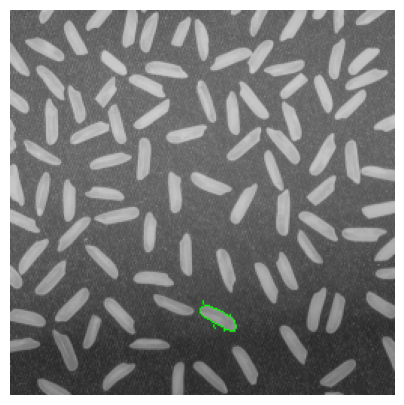

In [21]:
# Escriba un indice entre 0 y 83

choice = 12

color = (0,255,0) #(r,g,b)
thickness = 1
r = im.copy()

r = cv.drawContours(r, filtered_contours, choice, color, thickness)

print("El ángulo del arroz es: ", angulos[choice], "grados.")

view(r)